In [18]:
from main import run_main
import pandas as pd
import time
from copy import copy
import matplotlib.pyplot as plt
import math
import numpy as np

In [19]:
config = {
    "N": 150, 
    "K": 90,
    "M": 45,
    "threshold": 0.7,
    "character_type": "archer",
    "selection_method_1": "deterministic_tournament",
    "selection_method_2": "boltzmann", 
    "selection_method_3": "deterministic_tournament", 
    "selection_method_4": "boltzmann",  
    "crossing_method": "double_point",
    "mutation_method": "uniform_multigen",
    "new_generation_method": "new_over_actual",
    "gene": "items",
    "A": 0.5,
    "B": 0.5,
    "p_m": 0.1,
    "Tc": 0.1,
    "T0": 10,
    "k": 2,
    "max_generations": 250,
    "max_generations_without_change": 10,
    "delta": 0.01,
    "optimal_fitness": 100,
    "optimal_fitness_error": 2
}

In [36]:
init_size = 200
repeats = 2

totalIterations = ((init_size-1) * repeats)

lista = []

currentIteration = 0 
startTime = time.time()



for init in range(10,init_size):
    for _ in range(repeats):
        configCopy = copy(config)

        configCopy['N'] = init
        aux = math.floor(init * 0.6)
        if aux % 2 == 0:
            configCopy['K'] = aux
        else:
            configCopy['K'] = aux-1
        configCopy['M'] = math.floor(init * 0.3)

        lista.append((run_main(configCopy),configCopy))
        currentIteration += 1
        if currentIteration % 20 == 0:  # Actualizar cada 100 iteraciones
            elapsedTime = time.time() - startTime
            estimatedRemainingTime = (totalIterations - currentIteration) * (elapsedTime / currentIteration)
            percentageCompletion = (currentIteration / totalIterations) * 100
            print(f"\rCompletion: {percentageCompletion:.2f}% ETA: {estimatedRemainingTime:.2f}s", end="")


Completion: 10.05% ETA: 257.68s

In [ ]:
lista_aux = [{**{"strength": char[0]._items["strength"],
           "agility": char[0]._items["agility"],
           "expertise": char[0]._items["expertise"],
           "endurance": char[0]._items["endurance"],
           "health": char[0]._items["health"],
           "height": char[0]._height,
           "performance": char[0].get_performance(),
           "generation": char[1]},
        **conf}
       for char, conf in lista]

df = pd.DataFrame(lista_aux)

In [ ]:
df.to_csv('datos3.csv', index=False)

In [ ]:
meanPerformanceByN = df.groupby('N')['performance'].mean().reset_index()
meanPerformanceByN.describe()

,N,performance
count,195.000000,195.000000
mean,102.000000,27.585701
std,56.435804,1.660892
min,5.000000,21.006093
25%,53.500000,26.658756
50%,102.000000,27.664908
75%,150.500000,28.790721
max,199.000000,31.338630


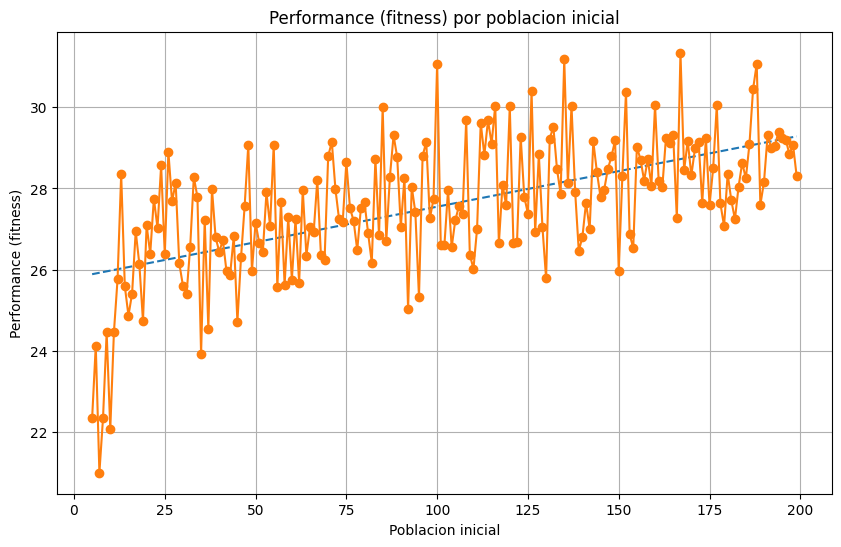

In [ ]:

# Fit a linear regression model to the data
coefficients = np.polyfit(meanPerformanceByN['N'], meanPerformanceByN['performance'], 1)
polynomial = np.poly1d(coefficients)
yFit = polynomial(meanPerformanceByN['N'])

# Add the regression line to the plot

plt.figure(figsize=(10, 6))
plt.plot(meanPerformanceByN['N'], yFit, '--', label='Regression Line')
plt.plot(meanPerformanceByN['N'], meanPerformanceByN['performance'], marker='o')
plt.title('Performance (fitness) por poblacion inicial')
plt.xlabel('Poblacion inicial')
plt.ylabel('Performance (fitness)')
plt.grid(True)
plt.show()

In [ ]:
meanGenerationByN = df.groupby('N')['generation'].mean().reset_index()
meanGenerationByN.describe()

,N,generation
count,195.000000,195.000000
mean,102.000000,15.287179
std,56.435804,3.276689
min,5.000000,12.500000
25%,53.500000,13.500000
50%,102.000000,14.500000
75%,150.500000,15.500000
max,199.000000,39.500000


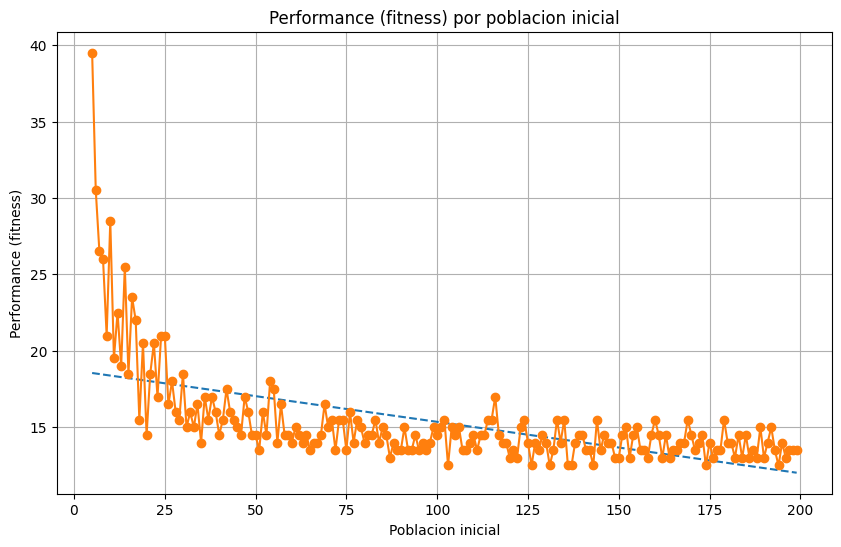

In [ ]:

# Fit a linear regression model to the data
coefficients = np.polyfit(meanGenerationByN['N'], meanGenerationByN['generation'], 1)
polynomial = np.poly1d(coefficients)
yFit = polynomial(meanGenerationByN['N'])

# Add the regression line to the plot

plt.figure(figsize=(10, 6))
plt.plot(meanGenerationByN['N'], yFit, '--', label='Regression Line')
plt.plot(meanGenerationByN['N'], meanGenerationByN['generation'], marker='o')
plt.title('Performance (fitness) por poblacion inicial')
plt.xlabel('Poblacion inicial')
plt.ylabel('Performance (fitness)')
plt.grid(True)
plt.show()